In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.cross_validation import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.utils import shuffle
from sklearn.svm import SVC
import pylab as pl
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import ParameterGrid
from scipy import interp
from sklearn.cross_validation import StratifiedKFold
import math
import sys
import itertools
from operator import itemgetter
from sklearn.feature_selection import RFECV
import random
import warnings
warnings.filterwarnings('ignore')

/Users/yimengz/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/yimengz/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [55]:
a = pd.read_csv('userCombFin3.csv') 

In [56]:
a.drop('Unnamed: 0', axis = 1, inplace = True)
a.columns.values

array(['last_login', 'id', 'username', 'email', 'first_name', 'last_name',
       'gender', 'tier', 'img_upload', 'bio', 'stripe', 'is_staff',
       'is_active', 'date_joined', 'Unnamed: 15', 'dob', 'email_verified',
       'img_activity', 'street_line1', 'street_line2', 'zipcode', 'city',
       'state', 'country', 'img_def', 'no_email', 'street1', 'street2'], dtype=object)

In [58]:
a = a[['id','first_name', 'last_name', 'gender', 'tier','Unnamed: 15','dob', 'img_upload', 'bio','stripe', 'is_staff', 'is_active', 'email_verified', 'img_def', 'no_email', 'street1', 'street2']]

In [59]:
a.rename(columns={'Unnamed: 15': 'dob2'},inplace=True)

In [61]:
a.dob2.fillna(0,inplace=True)

In [62]:
type(a.dob[1])

str

In [65]:
for i in a.dob[:5]:
    i=0
    print(i,type(i))

0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>


In [66]:
userComb = pd.read_csv('userCombFin2.csv') 

In [67]:
userComb.drop('Unnamed: 0', axis = 1, inplace = True)

In [68]:
userComb.head()

,last_login,id,username,email,first_name,last_name,gender,tier,img_upload,bio,...,street_line1,street_line2,zipcode,city,state,country,img_def,no_email,street1,street2
0,2017-01-27,1,migueldv90,miguel@penpalschools.com,2,0,1,4,1,9,...,0,0,0,Austin,TX,United States,1,1,0,0
1,2014-12-31,2,Zhuf,zhuf@sfusd.edu,2,0,0,2,0,0,...,0,0,0,SF,CA,United States,0,1,0,0
2,2014-12-31,3,oxheywood,mikki.caplan@gmail.com,2,0,0,2,0,0,...,0,0,0,Watford,England,United Kingdom,0,1,0,0
3,2015-05-24,4,mimobrow,0,2,0,0,1,0,0,...,0,0,0,Austin,TX,United States,0,0,0,0
4,2017-01-07,5,joetroyen,joe@penpalschools.com,2,0,0,4,1,2,...,0,0,0,Austin,TX,United States,1,1,0,0


In [69]:
userComb.columns.values

array(['last_login', 'id', 'username', 'email', 'first_name', 'last_name',
       'gender', 'tier', 'img_upload', 'bio', 'stripe', 'is_staff',
       'is_active', 'date_joined', 'dob', 'email_verified', 'img_activity',
       'street_line1', 'street_line2', 'zipcode', 'city', 'state',
       'country', 'img_def', 'no_email', 'street1', 'street2'], dtype=object)

In [70]:
userComb = userComb[['id','first_name', 'last_name', 'gender', 'tier', 'img_upload', 'bio','stripe', 'is_staff', 'is_active', 'email_verified', 'img_def', 'no_email', 'street1', 'street2']]

In [71]:
userComb.head()

,id,first_name,last_name,gender,tier,img_upload,bio,stripe,is_staff,is_active,email_verified,img_def,no_email,street1,street2
0,1,2,0,1,4,1,9,0,1,0,1,1,1,0,0
1,2,2,0,0,2,0,0,0,1,0,1,0,1,0,0
2,3,2,0,0,2,0,0,0,1,0,1,0,1,0,0
3,4,2,0,0,1,0,0,0,0,0,1,0,0,0,0
4,5,2,0,0,4,1,2,0,1,0,1,1,1,0,0


In [72]:
userComb = userComb[userComb["is_staff"]!=0]
userComb.drop("is_staff", axis=1, inplace = True)
userComb = userComb[userComb["is_active"]==0]
userComb.drop("is_active", axis=1, inplace = True)
userComb=userComb[userComb.tier!=4]
userComb=userComb[userComb.bio!=2]
#userComb=userComb[userComb.email!="porurpenpal@gmail.com"]

In [73]:
data = userComb.drop("id", axis=1)

In [74]:
data.head()

,first_name,last_name,gender,tier,img_upload,bio,stripe,email_verified,img_def,no_email,street1,street2
1,2,0,0,2,0,0,0,1,0,1,0,0
2,2,0,0,2,0,0,0,1,0,1,0,0
5,2,0,0,2,0,0,0,1,0,1,0,0
6,2,0,2,1,0,0,0,1,0,0,0,0
7,2,0,2,1,0,0,0,1,0,0,0,0


In [75]:
data.columns.values

array(['first_name', 'last_name', 'gender', 'tier', 'img_upload', 'bio',
       'stripe', 'email_verified', 'img_def', 'no_email', 'street1',
       'street2'], dtype=object)

In [76]:
len(data)

61505

In [77]:
y_truth = pd.read_csv('userLabel.csv')

In [78]:
y_truth.drop('Unnamed: 0', axis = 1, inplace = True)

In [79]:
y_truth=y_truth[y_truth.talkative==1]

In [80]:
y_truth.head()

,sender,talkative
1,5,1
2,39,1
3,41,1
4,118,1
5,157,1


In [81]:
len(y_truth)

2572

In [82]:
labelt=y_truth.sender.tolist()

In [83]:
userComb['truth']=0
for x in labelt:
    userComb.ix[userComb.id==x, 'truth'] = 1 

In [20]:
userComb.head()

,id,first_name,last_name,gender,tier,img_upload,bio,stripe,email_verified,img_def,no_email,street1,street2,truth
1,2,2,0,0,2,0,0,0,1,0,1,0,0,0
2,3,2,0,0,2,0,0,0,1,0,1,0,0,0
5,6,2,0,0,2,0,0,0,1,0,1,0,0,0
6,7,2,0,2,1,0,0,0,1,0,0,0,0,0
7,8,2,0,2,1,0,0,0,1,0,0,0,0,0


In [84]:
target = userComb['truth']
#features = data.as_matrix()
features = data

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [86]:
def run_classifier(classifier_id, X_train, X_test, Y_train, Y_test, axs, fig_row_idx):    
    classifiers = (None, SGDClassifier, LogisticRegression,RandomForestClassifier)
    classifier_name_list = (None, "SGDClassifier", "Logistic Regression","RandomForestClassifier")
    print("\n################################## Run %s ##################################\n" % classifier_name_list[classifier_id])
    print("# Train:")
  
    grid_SGD = [{'loss': ['hinge'], 'penalty': ['l2'], 'alpha': [0.1, 0.01, 0.001], 'class_weight': ['balanced']}]

    grid_LR = [{'C': [0.01,1, 10], 'class_weight': ['balanced']}]
    
    grid_RF = [{'max_depth': [5,10, 15], 'criterion': ['entropy'], 'n_estimators': [50, 100, 250], 'class_weight': ['balanced']}]

    grids = (None, grid_SGD, grid_LR,grid_RF)
    grid_obj = grids[classifier_id]
    cls_obj = classifiers[classifier_id]

    best_param = None
    best_score = None
    best_model = None

    # Performing cross validation using parameter grid
    for one_param in ParameterGrid(grid_obj):
        cls = cls_obj(**one_param)

        one_score = cross_val_score(cls, X_train, Y_train, cv=5, scoring='roc_auc')
        mscore = one_score.mean()
        

        if ( best_score is None or best_score < mscore): 
            best_param = one_param
            best_score = mscore
            best_model = cls
    
    print("Best param: %s" % repr(best_param))
    
    best_model.fit(X_train, Y_train)    
    
    best_params = get_best_model_params(best_model, X_train, Y_train, classifier_name_list[classifier_id], axs, fig_row_idx)
#     print("From training set, [best_fpr, best_tpr, best_threshold] = %s" % str([float(format(x, '.3f')) for x in best_params]))
    
    result = predict_test(best_model, X_test, Y_test, classifier_name_list[classifier_id], best_params, axs, fig_row_idx)
    
    result.append(explore_features_importance(best_model, classifier_name_list[classifier_id], X_train))
    
    return result

In [87]:
def get_best_model_params(best_model, x_data, y_data, classifier_name, axs, fig_row_idx):
    if classifier_name == 'SGDClassifier':
        confidence_score = best_model.decision_function(x_data)
        fpr, tpr, thresholds = roc_curve(y_data, confidence_score)
    else:
        probas_ = best_model.predict_proba(x_data) # len(probas_) = size of training set
        fpr, tpr, thresholds = roc_curve(y_data, probas_[:, 1]) # pick prob. of yes(encoded as 1)(corresponds to index 1)

    
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve: %.3f" % roc_auc)    
    plot_roc_curve(fpr, tpr, roc_auc, classifier_name, axs, fig_row_idx, 0)

    
    # find best params
    best_fpr = None
    best_tpr = None
    best_threshold = None
    min_distance = sys.maxsize
    for item in zip(fpr, tpr, thresholds):
        distance = math.sqrt(math.pow(item[0], 2) + math.pow(item[1] - 1, 2))
        if min_distance > distance:
            min_distance = distance
            best_fpr = item[0]
            best_tpr = item[1]
            best_threshold = item[2]    
    
    return [best_fpr, best_tpr, best_threshold]
    
def predict_test(best_model, x_data, y_data, classifier_name, best_params, axs, fig_row_idx):
    print("\n# Evaluate on test set:")
    if classifier_name == 'SGDClassifier':
        confidence_score = best_model.decision_function(x_data)
        fpr, tpr, thresholds = roc_curve(y_data, confidence_score)
    else:
        probas_ = best_model.predict_proba(x_data) # len(probas_) = size of testing set
        fpr, tpr, thresholds = roc_curve(y_data, probas_[:, 1]) # pick prob. of yes(encoded as 1)(corresponds to index 1)
    

    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve: %.3f" % roc_auc)    
    plot_roc_curve(fpr, tpr, roc_auc, classifier_name, axs, fig_row_idx, 1)
    return [roc_auc]
    
def plot_roc_curve(fpr, tpr, roc_auc, classifier_name, axs, fig_row_idx, fig_col_idx):
    axs[fig_row_idx, fig_col_idx].plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    axs[fig_row_idx, fig_col_idx].plot([0, 1], [0, 1], 'k--')
    if fig_col_idx == 0:
        axs[fig_row_idx, fig_col_idx].set(xlabel="False Positive Rate", ylabel="True Positive Rate", title='Use %s on train set' % classifier_name)
    else:
        axs[fig_row_idx, fig_col_idx].set(xlabel="False Positive Rate", ylabel="True Positive Rate", title='Use %s on test set' % classifier_name)
    axs[fig_row_idx, fig_col_idx].legend(loc="lower right")
    
def explore_features_importance(best_model, classifier_name, X_train):
    NUM_FEATURE_TO_SHOW = 5
    feature_names=['first_name','last_name','gender','tier','img_upload','bio','stripe','email_verified','img_def','no_email','street1','street2']
    if classifier_name == 'Decision Trees' or classifier_name == "RandomForestClassifier":
        importance_to_idx = []
        feature_importances = best_model.feature_importances_
        
        for idx in range(len(feature_importances)):
            importance_to_idx.append((feature_importances[idx], idx))
        sort_importance_to_idx = sorted(importance_to_idx, key=itemgetter(0), reverse=True)
                
        # return top NUM_FEATURE_TO_SHOW features
        return [feature_names[item[1]] for item in sort_importance_to_idx[:NUM_FEATURE_TO_SHOW]]
    else: 
        ranking_to_idx = []
    
        selector = RFECV(best_model, cv=5)
        selector = selector.fit(X_train, Y_train)

        rankings = selector.ranking_
        for idx in range(len(rankings)):
            ranking_to_idx.append((rankings[idx], idx))
        sort_ranking_to_idx = sorted(ranking_to_idx, key=itemgetter(0))
        
        # return top NUM_FEATURE_TO_SHOW features
        return [feature_names[item[1]] for item in sort_ranking_to_idx[:NUM_FEATURE_TO_SHOW]]



################################## Run SGDClassifier ##################################

# Train:
Best param: {'alpha': 0.1, 'class_weight': 'balanced', 'loss': 'hinge', 'penalty': 'l2'}
Area under the ROC curve: 0.776

# Evaluate on test set:
Area under the ROC curve: 0.779

################################## Run Logistic Regression ##################################

# Train:
Best param: {'C': 0.01, 'class_weight': 'balanced'}
Area under the ROC curve: 0.772

# Evaluate on test set:
Area under the ROC curve: 0.775

################################## Run RandomForestClassifier ##################################

# Train:
Best param: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 250}
Area under the ROC curve: 0.786

# Evaluate on test set:
Area under the ROC curve: 0.783


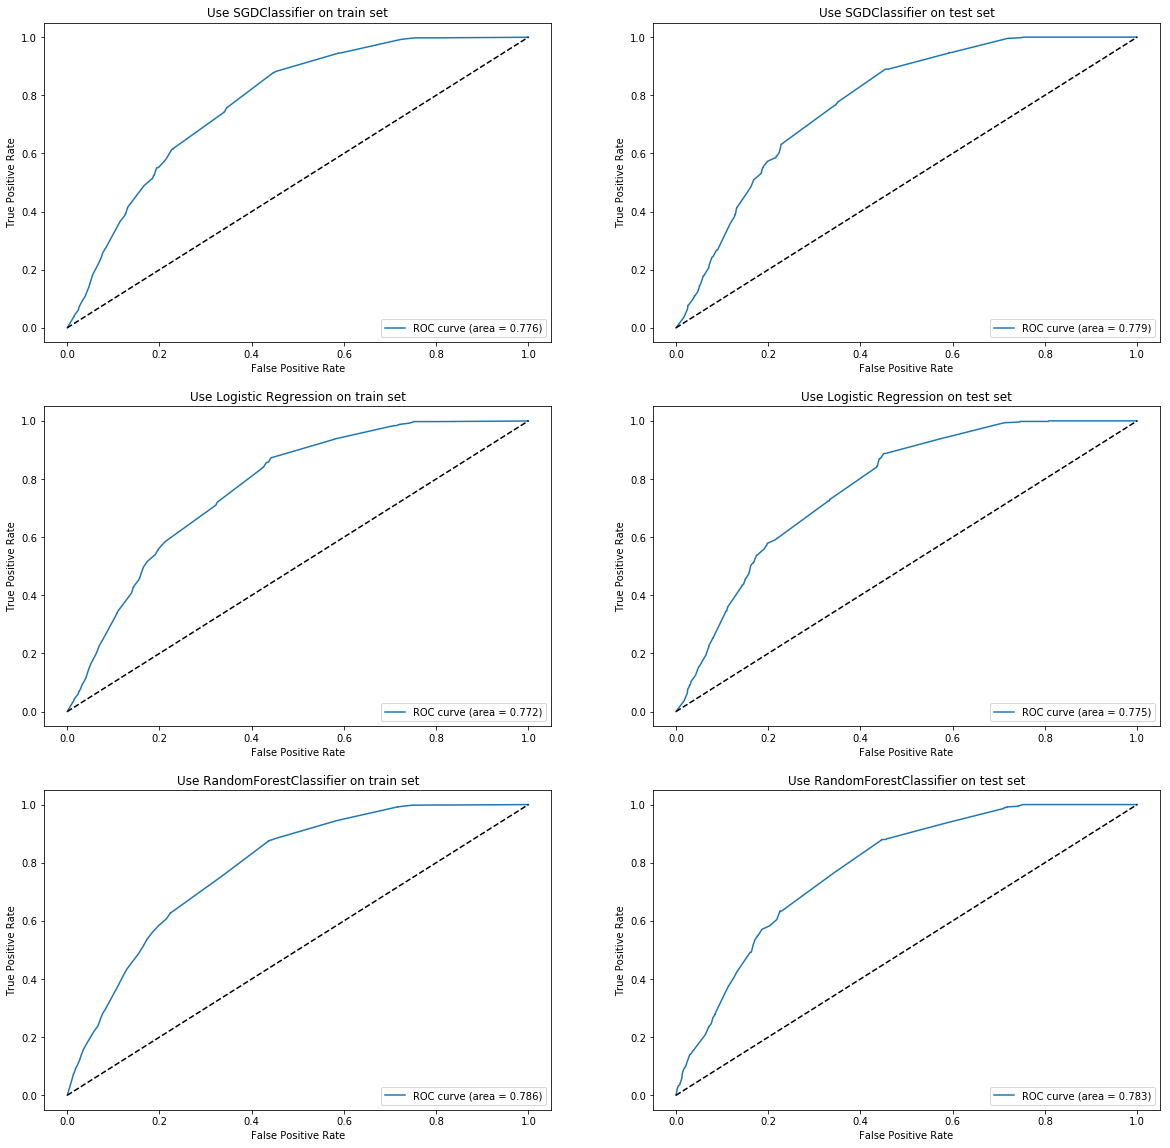

In [88]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
result_SGD = run_classifier(1, X_train, X_test, Y_train, Y_test, axs, 0)
result_LR = run_classifier(2, X_train, X_test, Y_train, Y_test, axs, 1)
result_RF = run_classifier(3, X_train, X_test, Y_train, Y_test, axs, 2)

In [43]:
result_SGD[1]

['first_name',
 'gender',
 'tier',
 'img_upload',
 'bio',
 'stripe',
 'email_verified',
 'img_def',
 'no_email',
 'street1',
 'street2',
 'last_name']

In [44]:
result_LR[1]

['first_name',
 'tier',
 'img_upload',
 'email_verified',
 'no_email',
 'img_def',
 'gender',
 'street1',
 'bio',
 'stripe',
 'street2',
 'last_name']

In [45]:
result_RF[1]

['gender',
 'bio',
 'first_name',
 'img_def',
 'img_upload',
 'no_email',
 'tier',
 'street1',
 'email_verified',
 'stripe',
 'street2',
 'last_name']